In [157]:
# // %%javascript
# // function toggler(){
# //     if(window.already_toggling){
# //         // Don't add multiple buttons.
# //         return 0
# //     }
# //     let btn = $('.input').append('<button>Toggle Code</button>')
# //         .children('button');
# //     btn.on('click', function(e){
# //         let tgt = e.currentTarget;
# //         $(tgt).parent().children('.inner_cell').toggle()
# //     })
# //     window.already_toggling = true;
# // }
# // // Since javascript cells are executed as soon as we load
# // // the notebook (if it's trusted), and this cell might be at the
# // // top of the notebook (so is executed first), we need to
# // // allow time for all of the other code cells to load before
# // // running. Let's give it 5 seconds.

# // setTimeout(toggler, 5000);

In [158]:
import ipywidgets as widgets
import sys
from pathlib import Path
import os
import importlib


module_path='preprocessing/day_intervals_preproc'
if module_path not in sys.path:
    sys.path.append(module_path)

module_path='utils'
if module_path not in sys.path:
    sys.path.append(module_path)
    
module_path='preprocessing/hosp_module_preproc'
if module_path not in sys.path:
    sys.path.append(module_path)
    
module_path='model'
if module_path not in sys.path:
    sys.path.append(module_path)
#print(sys.path)
root_dir = os.path.dirname(os.path.abspath('UserInterface.ipynb'))
import day_intervals_cohort
from day_intervals_cohort import *
import data_generation_icu

import data_generation

import feature_selection_hosp
from feature_selection_hosp import *
import train
from train import *
import feature_selection_icu
from feature_selection_icu import *
import fairness
import callibrate_output

In [159]:
root_dir

'C:\\Users\\mehak\\Desktop\\MIMIC-IV'

In [160]:
importlib.reload(day_intervals_cohort)
import day_intervals_cohort
from day_intervals_cohort import *

importlib.reload(data_generation_icu)
import data_generation_icu
importlib.reload(data_generation)
import data_generation

importlib.reload(feature_selection_hosp)
import feature_selection_hosp
from feature_selection_hosp import *

importlib.reload(feature_selection_icu)
import feature_selection_icu
from feature_selection_icu import *

importlib.reload(train)
import train
from train import *

importlib.reload(fairness)
import fairness

importlib.reload(callibrate_output)
import callibrate_output

# Welcome to your MIMIC-IV Project

This repository explains the steps to download and clean MIMIC-IV dataset for analysis.

Please go to https://physionet.org/content/mimiciv/1.0/

Follow instructions to get access to MIMIC-IV dataset.

Download the files using your terminal: wget -r -N -c -np --user mehakg --ask-password https://physionet.org/files/mimiciv/1.0/

Save downloaded files in the parent directory of this github repo. 

The structure should look like -
- mimic-iv-1.0/core
- mimic-iv-1.0/hosp
- mimic-iv-1.0/icu

## DATA EXTRACTION
Please run below cell to select option for cohort selection.
The cohort will be svaed in **./data/cohort/**

In [161]:
print("Extract Data")
print("Please select below if you want to work with ICU or Non-ICU data ?")
radio_input1 = widgets.RadioButtons(options=['ICU', 'Non-ICU'],value='ICU')
display(radio_input1)
      
print("Please select what prediction task you want to perform ?")
radio_input2 = widgets.RadioButtons(options=['30 Day Readmission','60 Day Readmission','90 Day Readmission','120 Day Readmission', 'Mortality'],value='30 Day Readmission')
display(radio_input2)
      
print("Please select if you want to perform choosen prediction task for a specific disease.")
radio_input3 = widgets.RadioButtons(options=['No Disease Filter','Heart Failure','CKD','CAD','COPD'],value='No Disease Filter')
display(radio_input3)
print("**Please run below cell to extract the cohort for selected options**")

Extract Data
Please select below if you want to work with ICU or Non-ICU data ?


RadioButtons(options=('ICU', 'Non-ICU'), value='ICU')

Please select what prediction task you want to perform ?


RadioButtons(options=('30 Day Readmission', '60 Day Readmission', '90 Day Readmission', '120 Day Readmission',…

Please select if you want to perform choosen prediction task for a specific disease.


RadioButtons(options=('No Disease Filter', 'Heart Failure', 'CKD', 'CAD', 'COPD'), value='No Disease Filter')

**Please run below cell to extract the cohort for selected options**


In [162]:
data_icu=radio_input1.value=="ICU"
data_mort=radio_input2.value=="Mortality"

    

if (radio_input3.value=="Heart Failure"):
    icd_code='I50'
elif (radio_input3.value=="CKD"):
    icd_code='N18'
elif (radio_input3.value=="COPD"):
    icd_code='J44'
elif (radio_input3.value=="CAD"):
    icd_code='I25'
else:
    icd_code='No Disease Filter'

cohort_output = extract_data(radio_input1.value,radio_input2.value,icd_code, root_dir)

EXTRACTING FOR: | ICU | MORTALITY |


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\mehak\\Desktop\\MIMIC-IV/mimic-iv-1.0/icu/icustays.csv.gz'

In [15]:
cohort_output='cohort_non-icu_30_day_readmission_I50'
data_icu=False
data_mort=False

## FEATURE SELECTION
Features available for ICU data -
- Diagnosis (https://mimic.mit.edu/docs/iv/modules/hosp/diagnoses_icd/)
- Procedures (https://mimic.mit.edu/docs/iv/modules/icu/procedureevents/)
- Medications (https://mimic.mit.edu/docs/iv/modules/icu/inputevents/)
- Output Events (https://mimic.mit.edu/docs/iv/modules/icu/outputevents/)
- Chart Events (https://mimic.mit.edu/docs/iv/modules/icu/chartevents/)

Features available for ICU data -
- Diagnosis (https://mimic.mit.edu/docs/iv/modules/hosp/diagnoses_icd/)
- Procedures (https://mimic.mit.edu/docs/iv/modules/hosp/procedures_icd/)
- Medications (https://mimic.mit.edu/docs/iv/modules/hosp/prescriptions/)
- Lab Events (https://mimic.mit.edu/docs/iv/modules/hosp/labevents/)

All features will be saved in **./data/features/**

**Please run below cell to select features**

In [6]:
print("Feature Selection")
if data_icu:
    print("Which Features you want to include for cohort?")
    check_input1 = widgets.Checkbox(description='Diagnosis')
    display(check_input1)
    check_input2 = widgets.Checkbox(description='Output Events')
    display(check_input2)
    check_input3 = widgets.Checkbox(description='Chart Events')
    display(check_input3)
    check_input4 = widgets.Checkbox(description='Procedures')
    display(check_input4)
    check_input5 = widgets.Checkbox(description='Medications')
    display(check_input5)
else:
    print("Which Features you want to include for cohort?")
    check_input1 = widgets.Checkbox(description='Diagnosis')
    display(check_input1)
    check_input2 = widgets.Checkbox(description='Labs')
    display(check_input2)
    check_input3 = widgets.Checkbox(description='Procedures')
    display(check_input3)
    check_input4 = widgets.Checkbox(description='Medications')
    display(check_input4)
print("**Please run below cell to extract selected features**")

Feature Selection
Which Features you want to include for cohort?


Checkbox(value=False, description='Diagnosis')

Checkbox(value=False, description='Labs')

Checkbox(value=False, description='Procedures')

Checkbox(value=False, description='Medications')

**Please run below cell to extract selected features**


In [7]:
diag_flag=True
out_flag=False
chart_flag=False
lab_flag=True
proc_flag=True
med_flag=True

In [17]:
if data_icu:
    diag_flag=check_input1.value
    out_flag=check_input2.value
    chart_flag=check_input3.value
    proc_flag=check_input4.value
    med_flag=check_input5.value
    feature_icu(cohort_output, diag_flag,out_flag,chart_flag,proc_flag,med_flag)
else:
    diag_flag=check_input1.value
    lab_flag=check_input2.value
    proc_flag=check_input3.value
    med_flag=check_input4.value
    feature_nonicu(cohort_output, diag_flag,lab_flag,proc_flag,med_flag)

[EXTRACTING DIAGNOSIS DATA]


100%|██████████| 5109/5109 [00:13<00:00, 373.83it/s]


# unique ICD-9 codes 5109
# unique ICD-10 codes 8053
# unique ICD-10 codes (After converting ICD-9 to ICD-10) 8366
# unique ICD-10 codes (After clinical gruping ICD-10 codes) 1349
# Admissions:   61453
[SUCCESSFULLY SAVED DIAGNOSIS DATA]
[EXTRACTING PROCEDURES DATA]
# Unique ICD9 Procedures:   1356
# Unique ICD10 Procedures:  3880

Value counts of each ICD version:
 9     69971
10    42745
Name: icd_version, dtype: int64
# Admissions:   34440
Total number of rows:  112716
[SUCCESSFULLY SAVED PROCEDURES DATA]
[EXTRACTING MEDICATIONS DATA]
Number of unique type of drug:  1814
Number of unique type of drug (after grouping to use Non propietary names):  925
Total number of rows:  1950039
# Admissions:   59934
[SUCCESSFULLY SAVED MEDICATIONS DATA]
[EXTRACTING LABS DATA]


13it [50:15, 231.98s/it]


# Itemid:
 842
# Admissions:   60899
Total number of rows:  16934549
[SUCCESSFULLY SAVED LABS DATA]


## CLINICAL GROUPING AND CLEANING OF FEATURES
Below you will have option to clinically group diagnosis and medications.
There also option to clean lab and chart events by performing outlier removal and unit conversion.

**Please run below cell to select preprocessing for diferent features**

In [18]:
if data_icu:
    if diag_flag:
        print("Do you want to group ICD 10 DIAG codes ?")
        radio_input4 = widgets.RadioButtons(options=['Keep both ICD-9 and ICD-10 codes','Convert ICD-9 to ICD-10 codes','Convert ICD-9 to ICD-10 and group ICD-10 codes'],value='Keep both ICD-9 and ICD-10 codes')
        display(radio_input4)   
    if chart_flag:
        print("Clean chart events ?")
        radio_input7 = widgets.RadioButtons(options=['Yes','No'],value='Yes')
        display(radio_input7)
    
else:
    if diag_flag:
        print("Do you want to group ICD 10 DIAG codes ?")
        radio_input4 = widgets.RadioButtons(options=['Keep both ICD-9 and ICD-10 codes','Convert ICD-9 to ICD-10 codes','Convert ICD-9 to ICD-10 and group ICD-10 codes'],value='Keep both ICD-9 and ICD-10 codes')
        display(radio_input4)         
    if med_flag:
        print("Do you want to group Medication codes to use Non propietary names?")
        radio_input5 = widgets.RadioButtons(options=['Yes','No'],value='Yes')
        display(radio_input5)
    if proc_flag:
        print("Which ICD codes for Procedures you want to keep in data?")
        radio_input6 = widgets.RadioButtons(options=['ICD-9 and ICD-10','ICD-10'],value='ICD-9 and ICD-10')
        display(radio_input6)
    if lab_flag:
        print("Clean labs ?")
        radio_input7 = widgets.RadioButtons(options=['Yes','No'],value='Yes')
        display(radio_input7)
print("**Please run below cell to perform feature preprocessing**")

Do you want to group ICD 10 DIAG codes ?


RadioButtons(options=('Keep both ICD-9 and ICD-10 codes', 'Convert ICD-9 to ICD-10 codes', 'Convert ICD-9 to I…

Do you want to group Medication codes to use Non propietary names?


RadioButtons(options=('Yes', 'No'), value='Yes')

Which ICD codes for Procedures you want to keep in data?


RadioButtons(options=('ICD-9 and ICD-10', 'ICD-10'), value='ICD-9 and ICD-10')

Clean labs ?


RadioButtons(options=('Yes', 'No'), value='Yes')

**Please run below cell to perform feature preprocessing**


In [19]:
group_diag=False
group_med=False
group_proc=False
if data_icu:
    if diag_flag:
        group_diag=radio_input4.value
    if chart_flag:
        clean_chart=radio_input4.value=='Yes'
    preprocess_features_icu(cohort_output, diag_flag, group_diag,chart_flag,clean_chart)
else:
    if diag_flag:
        group_diag=radio_input4.value
    if med_flag:
        group_med=radio_input5.value
    if proc_flag:
        group_proc=radio_input6.value
    if lab_flag:
        clean_lab=radio_input7.value=='Yes'
    preprocess_features_hosp(cohort_output, diag_flag,proc_flag,med_flag,lab_flag,group_diag,group_med,group_proc,clean_lab)

[PROCESSING DIAGNOSIS DATA]
Total number of rows 1074997
[SUCCESSFULLY SAVED DIAGNOSIS DATA]
[PROCESSING MEDICATIONS DATA]
Total number of rows 1949021
[SUCCESSFULLY SAVED MEDICATIONS DATA]
[PROCESSING PROCEDURES DATA]
Total number of rows 42745
[SUCCESSFULLY SAVED PROCEDURES DATA]
[PROCESSING LABS DATA]
Total number of rows 16640610
[SUCCESSFULLY SAVED LABS DATA]


### SUMMARY OF FEATURES

This step will generate summary of all features extracted so far.<br>
It will save summary files in **./data/summary/**<br>
- These files provide summary about **mean frequency** of medical codes per admission.<br>
- It also provides **total occurrence count** of each medical code.<br>
- For labs and chart events it will also provide <br>**missing %** which tells how many rows for a certain medical code has missing value.

Please use this information to further refine your cohort by selecting <br>which medical codes in each feature you want to keep and <br>which codes you would like to remove for downstream analysis tasks.

**Please run below cell to generate summary files**

In [20]:
generate_summary_hosp(diag_flag,proc_flag,med_flag,lab_flag)

[GENERATING FEATURE SUMMARY]


2it [00:18,  9.48s/it]


[SUCCESSFULLY SAVED FEATURE SUMMARY]


## Feature Selection

based on the files generated in previous step and other infromation gathered by you,<br>
Please select which medical codes you want to include in this study.

Please run below cell to to select options for which features you want to perform feature selection.

- Select **Yes** if you want to select a subset of medical codes for that feature and<br> **edit** the corresponding feature file for it.
- Select **No** if you want to keep all the codes in a feature.

In [21]:
if data_icu:
    if diag_flag:
        print("Do you want to do Feature Selection for Diagnosis \n (If yes, please edit list of codes in ./data/summary/diag_features.csv)")
        radio_input4 = widgets.RadioButtons(options=['Yes','No'],value='No')
        display(radio_input4)       
    if med_flag:
        print("Do you want to do Feature Selection for Medication \n (If yes, please edit list of codes in ./data/summary/med_features.csv)")
        radio_input5 = widgets.RadioButtons(options=['Yes','No'],value='No')
        display(radio_input5)   
    if proc_flag:
        print("Do you want to do Feature Selection for Procedures \n (If yes, please edit list of codes in ./data/summary/proc_features.csv)")
        radio_input6 = widgets.RadioButtons(options=['Yes','No'],value='No')
        display(radio_input6)   
    if out_flag:
        print("Do you want to do Feature Selection for Output event \n (If yes, please edit list of codes in ./data/summary/out_features.csv)")
        radio_input7 = widgets.RadioButtons(options=['Yes','No'],value='No')
        display(radio_input7)  
    if chart_flag:
        print("Do you want to do Feature Selection for Chart events \n (If yes, please edit list of codes in ./data/summary/chart_features.csv)")
        radio_input8 = widgets.RadioButtons(options=['Yes','No'],value='No')
        display(radio_input8)  
else:
    if diag_flag:
        print("Do you want to do Feature Selection for Diagnosis \n (If yes, please edit list of codes in ./data/summary/diag_features.csv)")
        radio_input4 = widgets.RadioButtons(options=['Yes','No'],value='No')
        display(radio_input4)         
    if med_flag:
        print("Do you want to do Feature Selection for Medication \n (If yes, please edit list of codes in ./data/summary/med_features.csv)")
        radio_input5 = widgets.RadioButtons(options=['Yes','No'],value='No')
        display(radio_input5)   
    if proc_flag:
        print("Do you want to do Feature Selection for Procedures \n (If yes, please edit list of codes in ./data/summary/proc_features.csv)")
        radio_input6 = widgets.RadioButtons(options=['Yes','No'],value='No')
        display(radio_input6)   
    if lab_flag:
        print("Do you want to do Feature Selection for Labs \n (If yes, please edit list of codes in ./data/summary/lab_features.csv)")
        radio_input7 = widgets.RadioButtons(options=['Yes','No'],value='No')
        display(radio_input7)   
print("**Please run below cell to perform feature selection**")

Do you want to do Feature Selection for Diagnosis 
 (If yes, please edit list of codes in ./data/summary/diag_features.csv)


RadioButtons(index=1, options=('Yes', 'No'), value='No')

Do you want to do Feature Selection for Medication 
 (If yes, please edit list of codes in ./data/summary/med_features.csv)


RadioButtons(index=1, options=('Yes', 'No'), value='No')

Do you want to do Feature Selection for Procedures 
 (If yes, please edit list of codes in ./data/summary/proc_features.csv)


RadioButtons(index=1, options=('Yes', 'No'), value='No')

Do you want to do Feature Selection for Labs 
 (If yes, please edit list of codes in ./data/summary/lab_features.csv)


RadioButtons(index=1, options=('Yes', 'No'), value='No')

**Please run below cell to perform feature selection**


In [22]:
select_diag=False
select_med=False
select_proc=False
select_lab=False
select_out=False
select_chart=False

if data_icu:
    if diag_flag:
        select_diag=radio_input4.value == 'Yes'
    if med_flag:
        select_med=radio_input5.value == 'Yes'
    if proc_flag:
        select_proc=radio_input6.value == 'Yes'
    if out_flag:
        select_out=radio_input7.value == 'Yes'
    if chart_flag:
        select_chart=radio_input8.value == 'Yes'
    features_selection_icu(cohort_output, diag_flag,proc_flag,med_flag,out_flag, chart_flag,select_diag,select_med,select_proc,select_out,select_chart)
else:
    if diag_flag:
        select_diag=radio_input4.value == 'Yes'
    if med_flag:
        select_med=radio_input5.value == 'Yes'
    if proc_flag:
        select_proc=radio_input6.value == 'Yes'
    if lab_flag:
        select_lab=radio_input7.value == 'Yes'
    features_selection_hosp(cohort_output, diag_flag,proc_flag,med_flag,lab_flag,select_diag,select_med,select_proc,select_lab)

## Time-Series Representation
In this section, please choose how you want to process and represent time-series data.

- First option is to select the length of time-series data you want to include for this study. (Default is 72 hours)

- Second option is to select bucket size which tells in what size time windows you want to divide your time-series.<br>
For example, if you select **2** bucket size, it wil aggregate data for every 2 hours and <br>a time-series of length 24 hours will be represented as time-series with 12 time-windows <br>where data for every 2 hours is agggregated from original raw time-series.

During this step, we will also save the time-series data in data dictionaries in the format that can be directly used for following deep learning analysis.

The data dictionaries will be saved in **./data/dict/**

Please refer the readme to know the structure of data dictionaries.

**Please run below cell to select time-series representation**

In [38]:
print("=======Time-series Data Represenation=======")

print("Length of data to be included for time-series prediction ?")
if(data_mort):
    radio_input8 = widgets.RadioButtons(options=['First 72 hours','First 48 hours','First 24 hours','Custom'],value='First 72 hours')
    display(radio_input8)
    text2=widgets.IntText(
        value=72,
        description='Last',
        disabled=False
    )
    display(text2)
else:
    radio_input8 = widgets.RadioButtons(options=['Last 72 hours','Last 48 hours','Last 24 hours','Custom'],value='Last 72 hours')
    display(radio_input8)
    text2=widgets.IntText(
        value=72,
        description='Last',
        disabled=False
    )
    display(text2)
    
print("What time bucket size you want to choose ?")
radio_input7 = widgets.RadioButtons(options=['1 hour','2 hour','3 hour','4 hour','5 hour','Custom'],value='1 hour')
display(radio_input7)
text1=widgets.IntText(
    value=1,
    description='Bucket Size (in hours):',
    disabled=False
)
display(text1)
print("**Please run below cell to perform time-series represenation and save in data dictionaries**")
# radio_input6 = widgets.RadioButtons(options=['0 hours','2 hours','4 hours','6 hours'],value='0 hours')
# if(data_mort):
#     print("If you have choosen mortality prediction task, then what prediction window length you want to keep?")
#     radio_input6 = widgets.RadioButtons(options=['2 hours','4 hours','6 hours','8 hours','Custom'],value='2 hours')
#     display(radio_input6)
#     text3=widgets.IntText(
#     value=2,
#     description='Prediction window (in hours)',
#     disabled=False
#     )
#     display(text3)

=======Time-series Data Represenation=======
Length of data to be included for time-series prediction ?


RadioButtons(options=('Last 72 hours', 'Last 48 hours', 'Last 24 hours', 'Custom'), value='Last 72 hours')

IntText(value=72, description='Last')

What time bucket size you want to choose ?


RadioButtons(options=('1 hour', '2 hour', '3 hour', '4 hour', '5 hour', 'Custom'), value='1 hour')

IntText(value=1, description='Bucket Size (in hours):')

**Please run below cell to perform time-series represenation and save in data dictionaries**


In [39]:
predW=0
if (radio_input7.value=='Custom'):
    bucket=int(text1.value)
else:
    bucket=int(radio_input7.value[0].strip())
if (radio_input8.value=='Custom'):
    include=int(text2.value)
else:
    include=int(radio_input8.value[5:7].strip())

if data_icu:
    gen=data_generation_icu.Generator(cohort_output,data_mort,diag_flag,proc_flag,out_flag,chart_flag,med_flag,include,bucket,predW)
else:
    gen=data_generation.Generator(cohort_output,data_mort,diag_flag,lab_flag,proc_flag,med_flag,include,bucket,predW)

[ READ COHORT ]
[ ======READING DIAGNOSIS ]
[ ======READING PROCEDURES ]
[ ======READING MEDICATIONS ]


0it [00:00, ?it/s]

[ ======READING LABS ]


2it [02:20, 70.38s/it]


[ READ ALL FEATURES ]


  0%|          | 0/24 [00:00<?, ?it/s]

[ PROCESSED TIME SERIES TO EQUAL LENGTH  ]


100%|██████████| 24/24 [00:04<00:00,  4.89it/s]


[ PROCESSED TIME SERIES TO EQUAL TIME INTERVAL ]
[ CREATING DATA DICTIONARIES ]


100%|██████████| 47422/47422 [45:00<00:00, 17.56it/s]  


[ SUCCESSFULLY SAVED DATA DICTIONARIES ]


## Model Building

**Go to ./model/parameter.py and define all variables needed for model building and training**

In [108]:
radio_input7=widgets.RadioButtons(options=['Time-series LSTM','Time-series CNN','Hybrid LSTM','Hybrid CNN','LSTM with Attention','LSTM with Maxpool'],value='Time-series LSTM')
display(radio_input7)

RadioButtons(options=('Time-series LSTM', 'Time-series CNN', 'Hybrid LSTM', 'Hybrid CNN', 'LSTM with Attention…

In [150]:
diag_flag=False
out_flag=False
chart_flag=False
lab_flag=False
proc_flag=False
med_flag=False


if data_icu:
    diag_flag=check_input1.value
    out_flag=check_input2.value
    chart_flag=check_input3.value
    proc_flag=check_input4.value
    med_flag=check_input5.value
    if med_flag:
        print("For Medications which data you want to use in prediction model?")
        radio_input10 = widgets.RadioButtons(options=['Time Signal','Time and Data Signal (Amount and rate of medication)'],value='Time Signal')
        display(radio_input10)
    if chart_flag:
        print("For Chart Events which data you want to use in prediction model?")
        radio_input11 = widgets.RadioButtons(options=['Time Signal','Time and Data Signal (Value of vitals)'],value='Time Signal')
        display(radio_input11)
    
else:
    diag_flag=check_input1.value
    lab_flag=check_input2.value
    proc_flag=check_input3.value
    med_flag=check_input4.value
    if med_flag:
        print("For Medications which data you want to use in prediction model?")
        radio_input10 = widgets.RadioButtons(options=['Time Signal','Time and Data Signal (Dose)'],value='Time Signal')
        display(radio_input10)
    if lab_flag:
        print("For Lab Events which data you want to use in prediction model?")
        radio_input11 = widgets.RadioButtons(options=['Time Signal','Time and Data Signal (Value of vitals)'],value='Time Signal')
        display(radio_input11)
    

For Medications which data you want to use in prediction model?


RadioButtons(options=('Time Signal', 'Time and Data Signal (Dose)'), value='Time Signal')

For Lab Events which data you want to use in prediction model?


RadioButtons(options=('Time Signal', 'Time and Data Signal (Value of vitals)'), value='Time Signal')

[ TRAIN-TEST-VALIDATION SET CREATED ]
[ MODEL CREATED ]
LSTMAttn(
  (med): CodeAttn(
    (codeEmbed): Embedding(844, 124, padding_idx=0)
    (codeRnn): LSTM(124, 512, num_layers=2, batch_first=True, dropout=0.2)
    (code_fc): Linear(in_features=512, out_features=1, bias=False)
  )
  (proc): CodeAttn(
    (codeEmbed): Embedding(652, 124, padding_idx=0)
    (codeRnn): LSTM(124, 512, num_layers=2, batch_first=True, dropout=0.2)
    (code_fc): Linear(in_features=512, out_features=1, bias=False)
  )
  (lab): CodeAttn(
    (codeEmbed): Embedding(657, 124, padding_idx=0)
    (codeRnn): LSTM(124, 512, num_layers=2, batch_first=True, dropout=0.2)
    (code_fc): Linear(in_features=512, out_features=1, bias=False)
  )
  (condEmbed): Embedding(1329, 124, padding_idx=0)
  (condfc): Linear(in_features=6944, out_features=512, bias=False)
  (ethEmbed): Embedding(9, 124, padding_idx=0)
  (genderEmbed): Embedding(3, 124, padding_idx=0)
  (ageEmbed): Embedding(87, 124, padding_idx=0)
  (demo_fc): Linear

KeyboardInterrupt: 

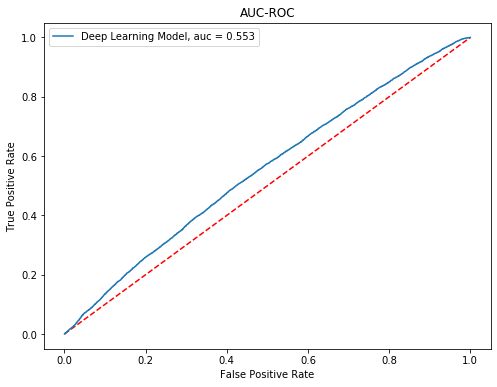

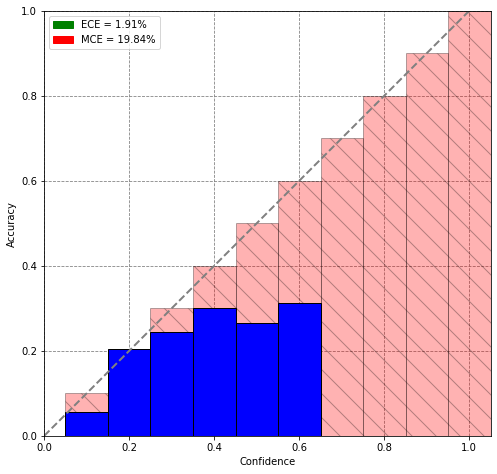

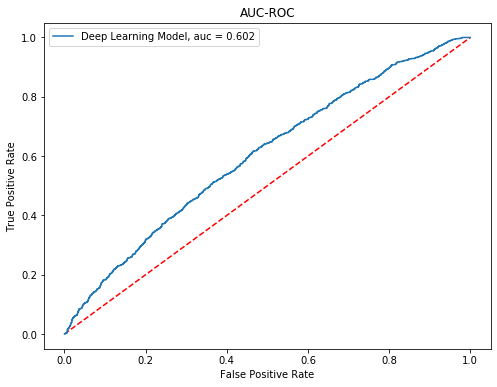

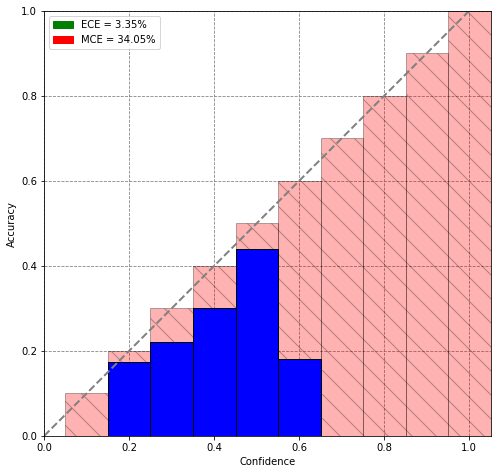

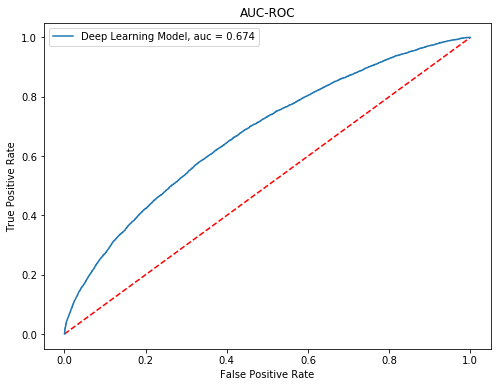

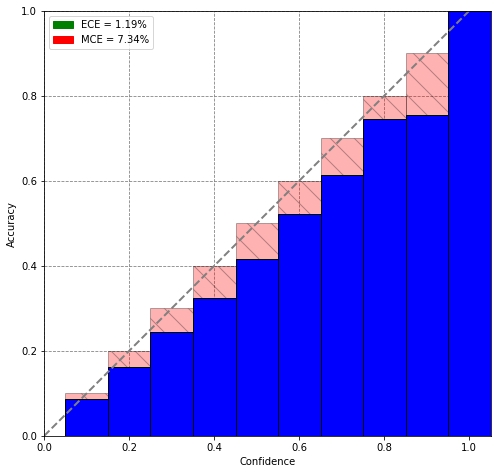

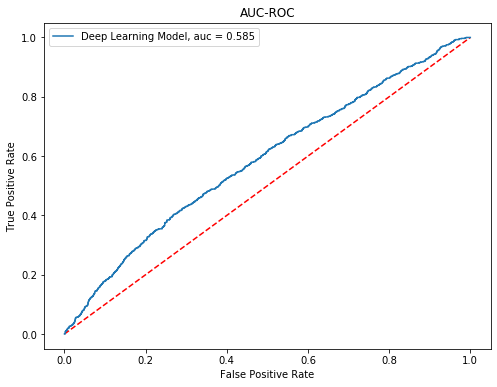

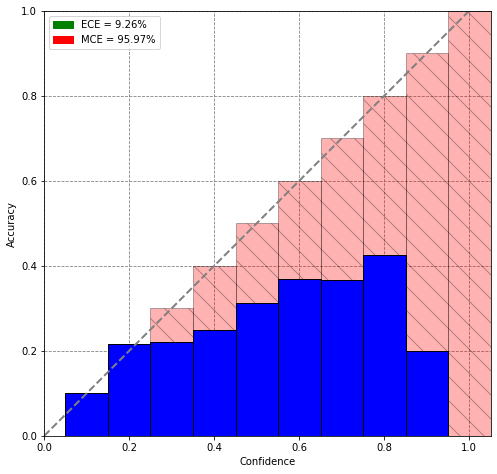

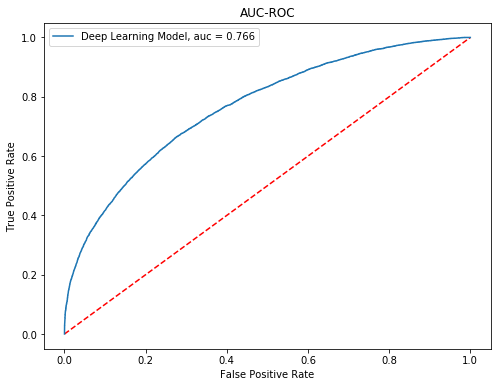

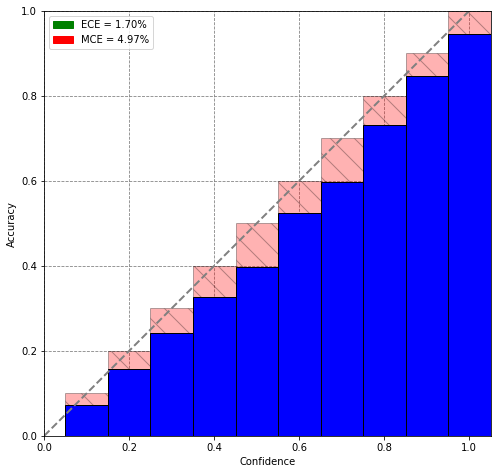

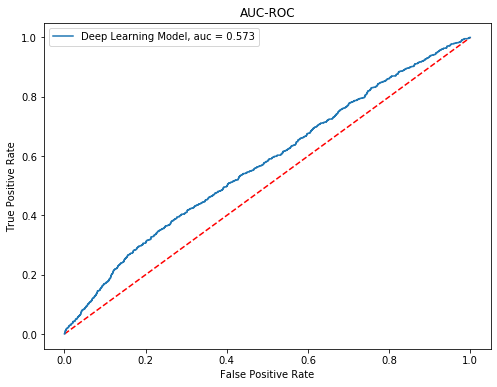

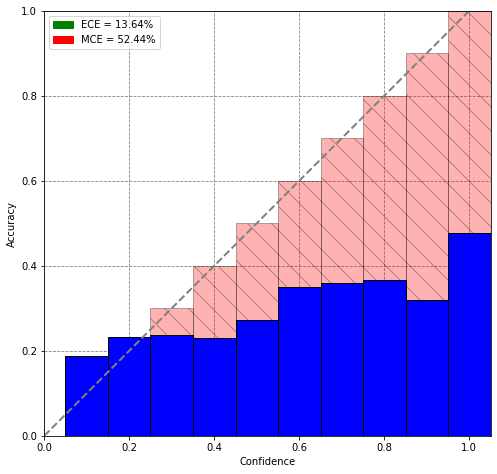

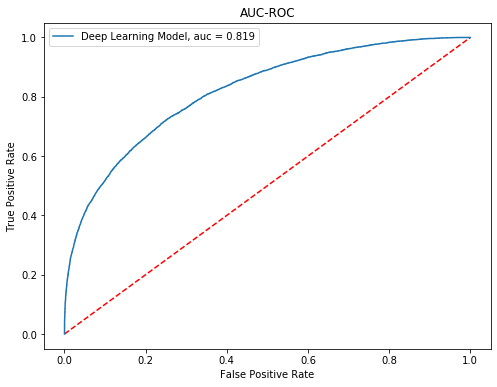

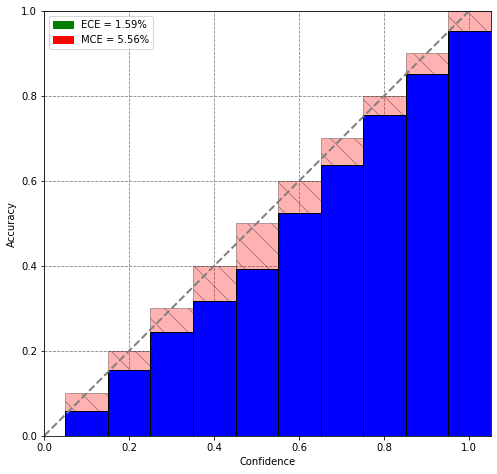

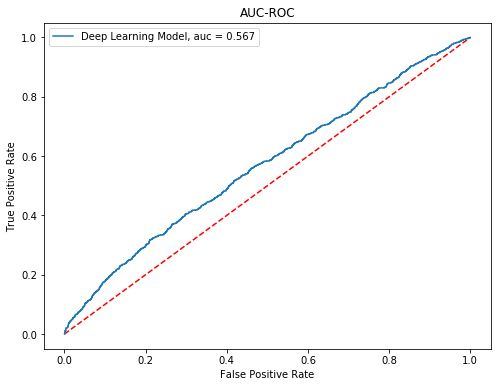

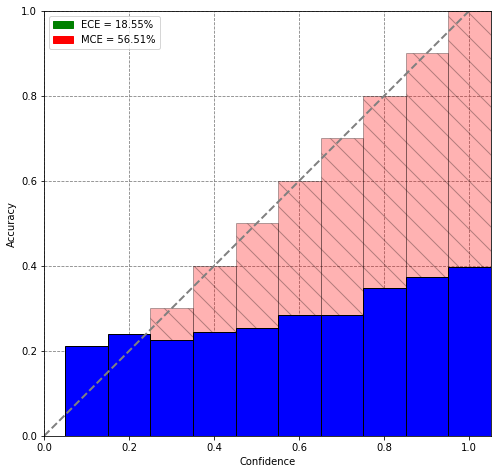

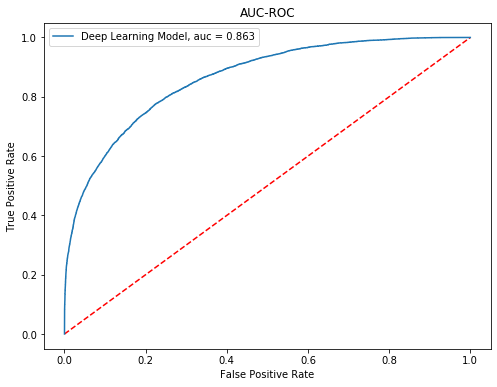

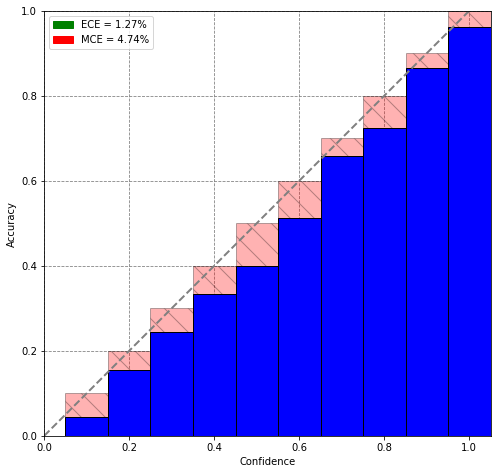

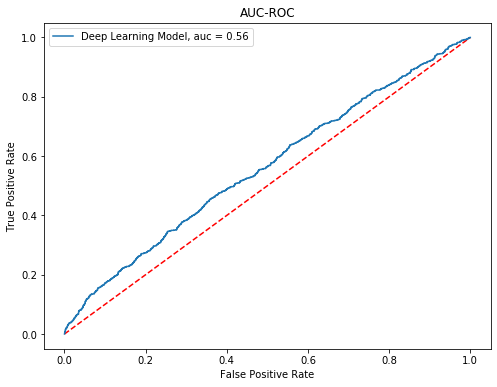

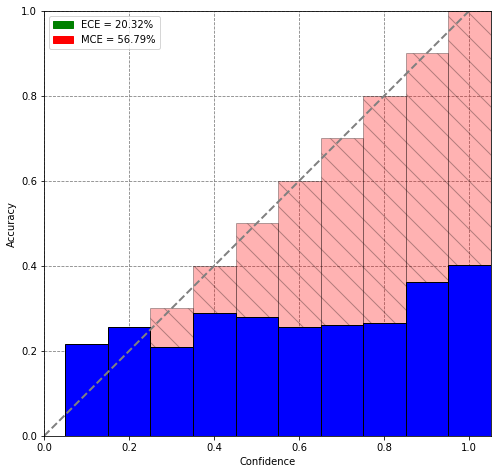

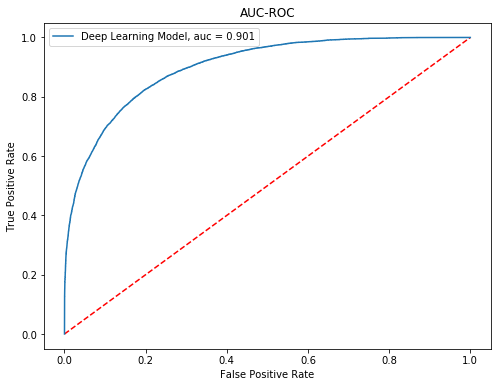

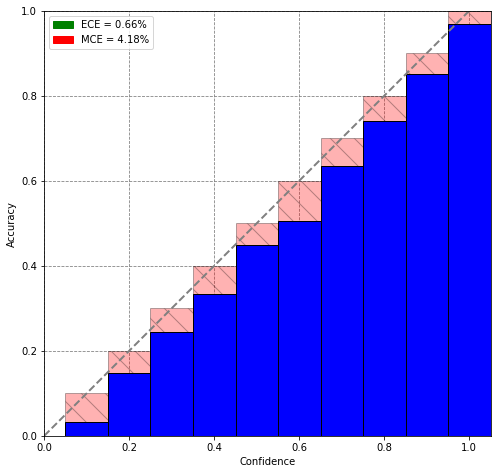

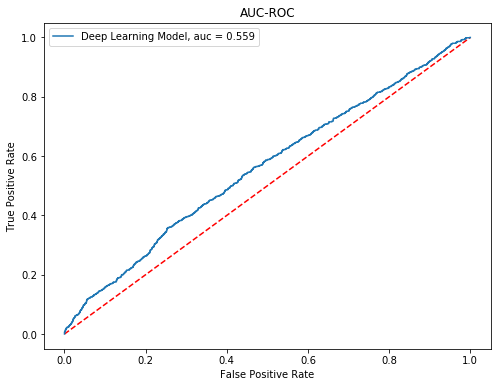

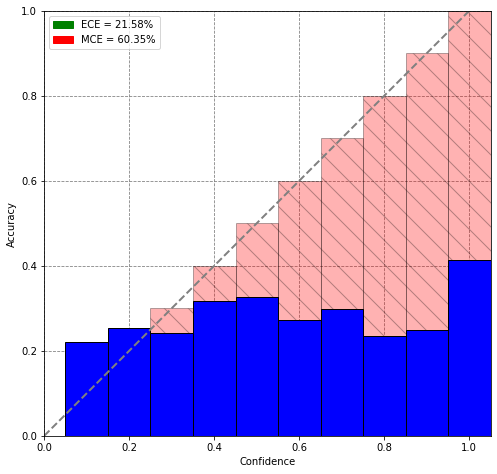

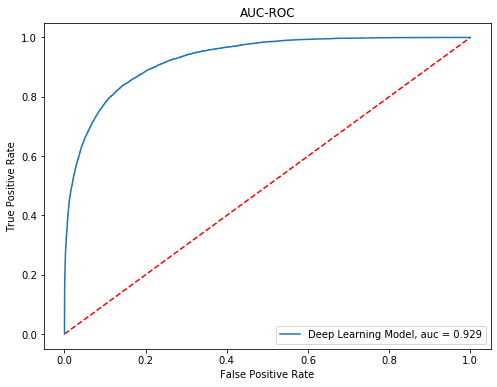

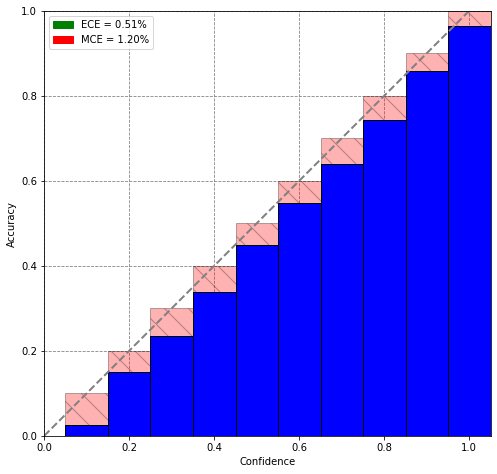

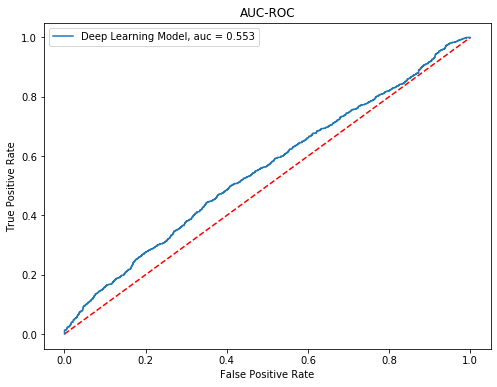

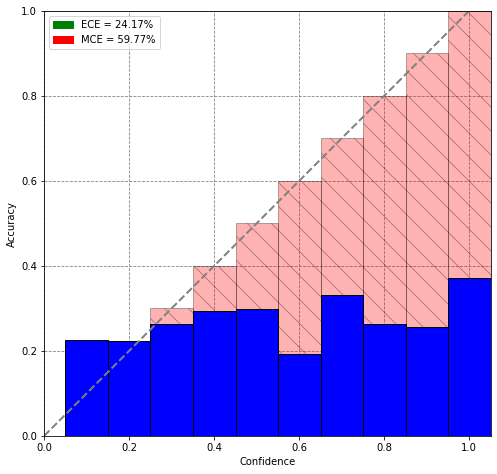

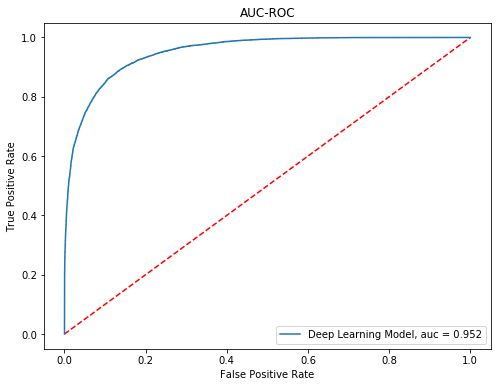

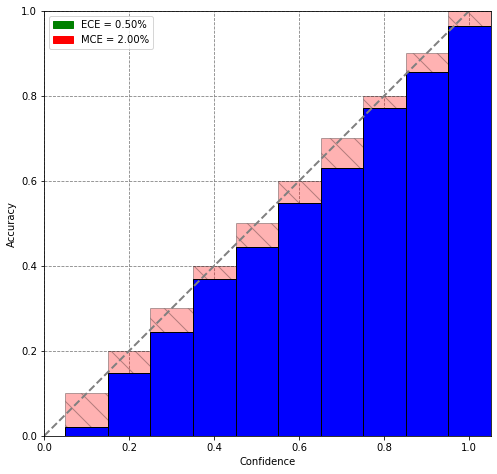

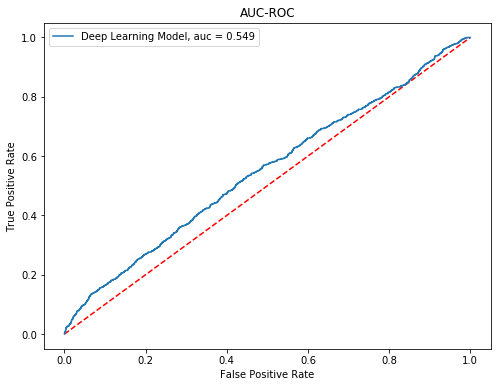

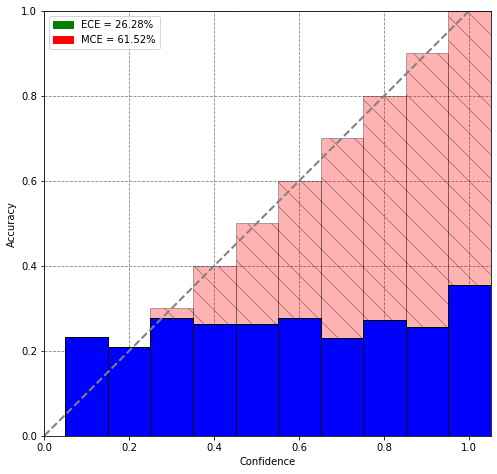

In [156]:
if data_icu:
    model=Model_Train(diag_flag,proc_flag,out_flag,chart_flag,med_flag,False,radio_input10.value=='Time Signal',radio_input11.value=='Time Signal',radio_input7.value,model_name='modelcnn',train=True,init_batches=False)
else:
    model=Model_Train(diag_flag,proc_flag,False,False,med_flag,lab_flag,radio_input10.value=='Time Signal',radio_input11.value=='Time Signal',radio_input7.value,model_name='modelcnn',train=True,init_batches=False)

### FAIRNESS EVALUATION
In train and testing step we save output files in ./data/output/ folder.
This file conatins list of demographic variables included in training and testing of the model.
It also contains the ground truth labels and predicted probability for each sample.
We use the above saved data to perform fairness evaluation of the results obtained from model testing.

In [107]:
fairness.fairness_evaluation(inputFile='outputDict',outputFile='fairnessReport')

,sensitive_attribute,group,tp,tn,fp,fn,tpr,tnr,fpr,fnr,accuracy
0,ethnicity,AMERICAN INDIAN/ALASKA NATIVE,3,7,13,3,0.500000,0.350000,0.650000,0.500000,0.384615
1,ethnicity,ASIAN,11,34,116,34,0.244444,0.226667,0.773333,0.755556,0.230769
2,ethnicity,BLACK/AFRICAN AMERICAN,156,348,783,304,0.339130,0.307692,0.692308,0.660870,0.316782
3,ethnicity,HISPANIC/LATINO,44,79,207,90,0.328358,0.276224,0.723776,0.671642,0.292857
4,ethnicity,OTHER,31,58,218,42,0.424658,0.210145,0.789855,0.575342,0.255014
5,ethnicity,UNABLE TO OBTAIN,2,4,29,4,0.333333,0.121212,0.878788,0.666667,0.153846
6,ethnicity,UNKNOWN,1,21,249,21,0.045455,0.077778,0.922222,0.954545,0.075342
7,ethnicity,WHITE,560,1318,3734,1076,0.342298,0.260887,0.739113,0.657702,0.280801
8,gender,F,359,872,2613,730,0.329660,0.250215,0.749785,0.670340,0.269130
9,gender,M,449,997,2736,844,0.347254,0.267077,0.732923,0.652746,0.287704


### MODEL CALLIBRATION

BEFORE CALLIBRATION
BCE Loss: 4.50
AU-ROC: 0.55
AU-PRC: 0.30
AU-PRC Baaseline: 0.25
Accuracy: 0.64
Precision: 0.30
Recall: 0.34
Specificity: 0.74
NPV: 0.77
ECE: 0.29
MCE: 0.63
AFTER CALLIBRATION
BCE Loss: 1.40
AU-ROC: 0.55
AU-PRC: 0.30
AU-PRC Baaseline: 0.25
Accuracy: 0.25
Precision: 0.25
Recall: 1.00
Specificity: 0.00
NPV: nan
ECE: 0.31
MCE: 0.39


RuntimeError: Can't call numpy() on Variable that requires grad. Use var.detach().numpy() instead.

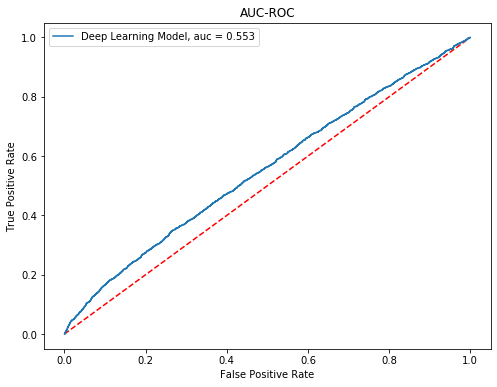

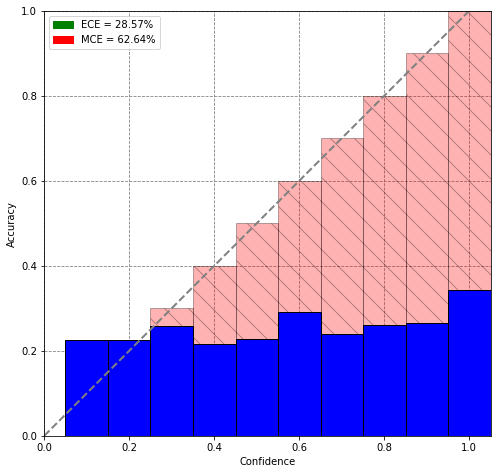

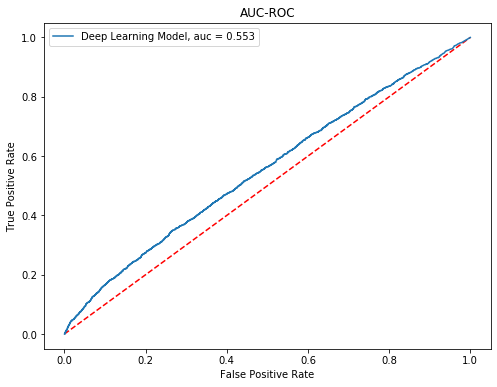

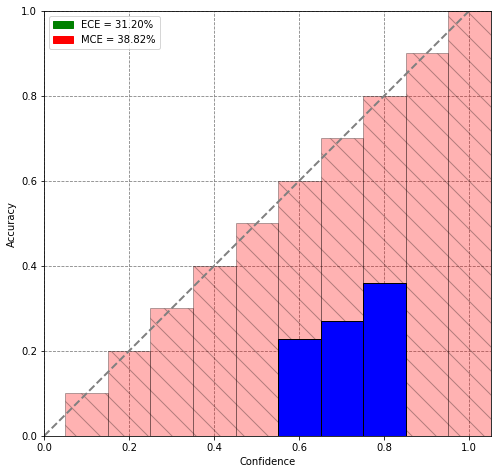

In [105]:
callibrate_output.callibrate(inputFile='outputDict',outputFile='callibratedResults')

In [205]:
x = torch.randn(2, 2,3,4)
y = torch.randn(2, 3)

In [206]:
x

tensor([[[[-0.8554, -1.7977,  0.4582,  1.8944],
          [ 1.8028, -0.1449, -1.5178, -0.3741],
          [-0.0317, -0.7055,  0.1119, -0.3086]],

         [[-0.4055,  1.0600,  0.5602,  0.3952],
          [ 0.1695, -1.2989,  0.9525,  1.4026],
          [-1.1560, -0.8623, -0.6614, -1.6802]]],


        [[[-0.2418, -1.6572,  0.1843,  0.8829],
          [-1.3924,  0.1303,  1.8525,  0.9157],
          [ 0.1695, -2.9129,  0.5846, -0.8371]],

         [[-0.8857,  0.7988, -2.4577, -0.6887],
          [-1.3697,  0.0197,  1.2520, -1.0553],
          [ 1.4066,  0.4216, -0.7972, -0.8058]]]])

In [217]:
x1=torch.transpose(x,1,2)

In [220]:
x1

tensor([[[[-0.8554, -1.7977,  0.4582,  1.8944],
          [-0.4055,  1.0600,  0.5602,  0.3952]],

         [[ 1.8028, -0.1449, -1.5178, -0.3741],
          [ 0.1695, -1.2989,  0.9525,  1.4026]],

         [[-0.0317, -0.7055,  0.1119, -0.3086],
          [-1.1560, -0.8623, -0.6614, -1.6802]]],


        [[[-0.2418, -1.6572,  0.1843,  0.8829],
          [-0.8857,  0.7988, -2.4577, -0.6887]],

         [[-1.3924,  0.1303,  1.8525,  0.9157],
          [-1.3697,  0.0197,  1.2520, -1.0553]],

         [[ 0.1695, -2.9129,  0.5846, -0.8371],
          [ 1.4066,  0.4216, -0.7972, -0.8058]]]])

In [221]:
x1=torch.reshape(x1,(2,3,-1))

In [222]:
x1

tensor([[[-0.8554, -1.7977,  0.4582,  1.8944, -0.4055,  1.0600,  0.5602,
           0.3952],
         [ 1.8028, -0.1449, -1.5178, -0.3741,  0.1695, -1.2989,  0.9525,
           1.4026],
         [-0.0317, -0.7055,  0.1119, -0.3086, -1.1560, -0.8623, -0.6614,
          -1.6802]],

        [[-0.2418, -1.6572,  0.1843,  0.8829, -0.8857,  0.7988, -2.4577,
          -0.6887],
         [-1.3924,  0.1303,  1.8525,  0.9157, -1.3697,  0.0197,  1.2520,
          -1.0553],
         [ 0.1695, -2.9129,  0.5846, -0.8371,  1.4066,  0.4216, -0.7972,
          -0.8058]]])

In [158]:
y=y.unsqueeze(2)

In [159]:
y.shape

torch.Size([2, 3, 1])

In [160]:
torch.cat((x,y),2)

tensor([[[-1.3345,  0.5846, -0.6159, -1.5423, -0.0743,  0.6192],
         [-0.6878,  0.4869, -0.4386,  0.6494, -0.1319,  2.0304],
         [-0.2942, -0.5029,  0.1497, -0.0272, -2.3339,  1.4728]],

        [[ 0.5737,  1.6204,  0.3547,  0.8374,  0.4905,  0.9802],
         [-0.3858, -0.1881, -2.2810,  1.3888,  0.1471,  3.2775],
         [-0.0214, -1.5219, -0.4022,  2.1461, -0.0829,  0.7473]]])

In [530]:
model=Model_Train(diag_flag,proc_flag,out_flag,chart_flag,med_flag)

[ DATA DIVIDED INTO BATCHES ]
[ TRAIN-TEST-VALIDATION SET CREATED ]
[ MODEL CREATED ]
CNNBaseH(
  (med): CodeCNN(
    (codeEmbed): Embedding(274, 124, padding_idx=0)
    (conv1): Conv1d(124, 256, kernel_size=(3,), stride=(1,))
    (bn1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (maxpool1): AdaptiveMaxPool1d(output_size=1)
  )
  (proc): CodeCNN(
    (codeEmbed): Embedding(152, 124, padding_idx=0)
    (conv1): Conv1d(124, 256, kernel_size=(3,), stride=(1,))
    (bn1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (maxpool1): AdaptiveMaxPool1d(output_size=1)
  )
  (condEmbed): Embedding(1424, 124, padding_idx=0)
  (ethEmbed): Embedding(9, 124, padding_idx=0)
  (genderEmbed): Embedding(3, 124, padding_idx=0)
  (ageEmbed): Embedding(84, 124, padding_idx=0)
  (demo_fc): Linear(in_features=372, out_features=256, bias=False)
  (fc): Linear(in_features=5604, out_features=1, bias=False)
  (sig): Sigmoid()
)
[ TRAI

RuntimeError: size mismatch, m1: [200 x 5348], m2: [5604 x 1] at C:\w\1\s\tmp_conda_3.7_055457\conda\conda-bld\pytorch_1565416617654\work\aten\src\TH/generic/THTensorMath.cpp:752

In [338]:
with open ('./data/dict/'+'outputDict', 'rb') as fp:
        ageVocabDict = pickle.load(fp)

In [175]:
model.val_batch

[90, 171, 183, 104, 40, 35, 149, 136, 151, 59, 33, 78, 21, 63, 31]

## Evaluation

In [21]:
#print("Which Features you want to include for cohort?")
check_input5 = widgets.Checkbox(description='Accuracy')
display(check_input5)
check_input6 = widgets.Checkbox(description='Precision/PPV')
display(check_input6)
check_input7 = widgets.Checkbox(description='Recall/TPR/Sensitivity')
display(check_input7)
check_input8 = widgets.Checkbox(description='AUROC')
display(check_input8)
check_input9 = widgets.Checkbox(description='AUROC-Plot')
display(check_input9)
check_input10 = widgets.Checkbox(description='AUPRC')
display(check_input10)
check_input11 = widgets.Checkbox(description='AUPRC-Plot')
display(check_input11)
check_input12 = widgets.Checkbox(description='Specificity/TNR')
display(check_input12)
check_input13 = widgets.Checkbox(description='NPV')
display(check_input13)
check_input14 = widgets.Checkbox(description='Callibration')
display(check_input14)
check_input15 = widgets.Checkbox(description='Fairness')
display(check_input15)

Checkbox(value=False, description='Accuracy')

Checkbox(value=False, description='Precision/PPV')

Checkbox(value=False, description='Recall/TPR/Sensitivity')

Checkbox(value=False, description='AUROC')

Checkbox(value=False, description='AUROC-Plot')

Checkbox(value=False, description='AUPRC')

Checkbox(value=False, description='AUPRC-Plot')

Checkbox(value=False, description='Specificity/TNR')

Checkbox(value=False, description='NPV')

Checkbox(value=False, description='Callibration')

Checkbox(value=False, description='Fairness')

In [ ]:
loss=evaluation.Loss()
loss(model.pred,model.labels)